# DataSpark: Illuminating Insights for Global Electronics

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
import mysql.connector

In [5]:
df_store=pd.read_csv("Stores.csv")

In [7]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [9]:
df_store

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [11]:
df_store.isna().sum()


StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [13]:
df_store["Open Date"]=pd.to_datetime(df_store["Open Date"])

In [15]:
df_store.fillna(0,inplace=True)

In [17]:
df_store.drop_duplicates(inplace=True)

In [19]:
import pandas as pd

In [21]:
df_store.dtypes

StoreKey                  int64
Country                  object
State                    object
Square Meters           float64
Open Date        datetime64[ns]
dtype: object

In [23]:
df_store.columns=df_store.columns.str.replace(" ","")

In [25]:
df_store.rename(columns={
    'State'     : 'Store_State',
    'Country'   : 'Store_Country',
    }, inplace=True)

In [27]:
def get_age(date):
    today = datetime.now()
    return(today.year - date.year - ((today.month, today.day) < (date.month, date.day)))

In [29]:
df_store['StoreAge'] = df_store['OpenDate'].apply(get_age)

In [31]:
df_store.head(10)

,StoreKey,Store_Country,Store_State,SquareMeters,OpenDate,StoreAge
0,1,Australia,Australian Capital Territory,595.0,2008-01-01,16
1,2,Australia,Northern Territory,665.0,2008-01-12,16
2,3,Australia,South Australia,2000.0,2012-01-07,12
3,4,Australia,Tasmania,2000.0,2010-01-01,14
4,5,Australia,Victoria,2000.0,2015-12-09,9
5,6,Australia,Western Australia,2000.0,2010-01-01,14
6,7,Canada,New Brunswick,1105.0,2007-05-07,17
7,8,Canada,Newfoundland and Labrador,2105.0,2014-07-02,10
8,9,Canada,Northwest Territories,1500.0,2005-03-04,19
9,10,Canada,Nunavut,1210.0,2015-04-04,9


In [33]:
df_store.to_csv("Cleaned_store.csv")

Text(0, 0.5, 'Frequency')

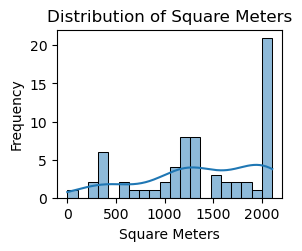

In [35]:
# 1. Distribution of Square Meters
plt.subplot(2, 2, 1)
sns.histplot(df_store['SquareMeters'], bins=20, kde=True)
plt.title('Distribution of Square Meters')
plt.xlabel('Square Meters')
plt.ylabel('Frequency')

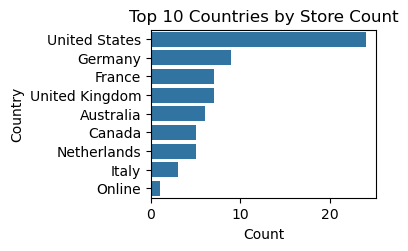

In [37]:
# 2. Stores by Country (Top 10 Countries) 
plt.subplot(2, 2, 2)
if 'Store_Country' in df_store.columns:
    sns.countplot(y='Store_Country', data=df_store, order=df_store['Store_Country'].value_counts().index[:10])
    plt.title('Top 10 Countries by Store Count')
    plt.xlabel('Count')
    plt.ylabel('Country')

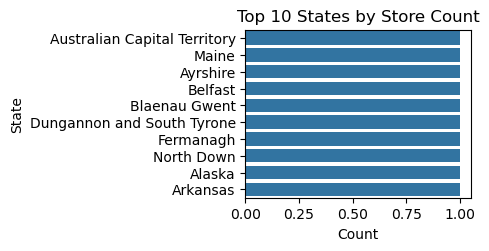

In [39]:
# 3. States by Store Age (Top 10 States)
plt.subplot(2, 2, 3)
if 'Store_State' in df_store.columns:
    sns.countplot(y='Store_State', data=df_store, order=df_store['Store_State'].value_counts().index[:10])
    plt.title('Top 10 States by Store Count')
    plt.xlabel('Count')
    plt.ylabel('State')

In [157]:
df_sales.columns

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code'],
      dtype='object')

In [159]:
df_exchange_rates.columns

Index(['Date', 'Currency', 'Exchange'], dtype='object')

In [163]:
df_store.columns

Index(['StoreKey', 'Store_Country', 'Store_State', 'SquareMeters', 'OpenDate',
       'StoreAge'],
      dtype='object')

In [167]:
df_product.columns

Index(['ProductKey', 'Product Name', 'Brand', 'Color', 'Unit Cost USD',
       'Unit Price USD', 'SubcategoryKey', 'Subcategory', 'CategoryKey',
       'Category'],
      dtype='object')

In [169]:
df_customer.columns

Index(['CustomerKey', 'Gender', 'Name', 'Cust_City', 'State Code',
       'Cust_State', 'Zip Code', 'Cust_Country', 'Cust_Continent', 'Birthday',
       'Age'],
      dtype='object')

In [43]:
df_exchange_rates=pd.read_csv("Exchange_rates.csv")

In [45]:
df_exchange_rates.dtypes

Date         object
Currency     object
Exchange    float64
dtype: object

In [47]:
df_exchange_rates.isna().sum()

Date        0
Currency    0
Exchange    0
dtype: int64

In [49]:
df_exchange_rates["Date"]=pd.to_datetime(df_exchange_rates["Date"])

In [51]:
df_exchange_rates

,Date,Currency,Exchange
0,2015-01-01,USD,1.0000
1,2015-01-01,CAD,1.1583
2,2015-01-01,AUD,1.2214
3,2015-01-01,EUR,0.8237
4,2015-01-01,GBP,0.6415
...,...,...,...
11210,2021-02-20,USD,1.0000
11211,2021-02-20,CAD,1.2610
11212,2021-02-20,AUD,1.2723
11213,2021-02-20,EUR,0.8238


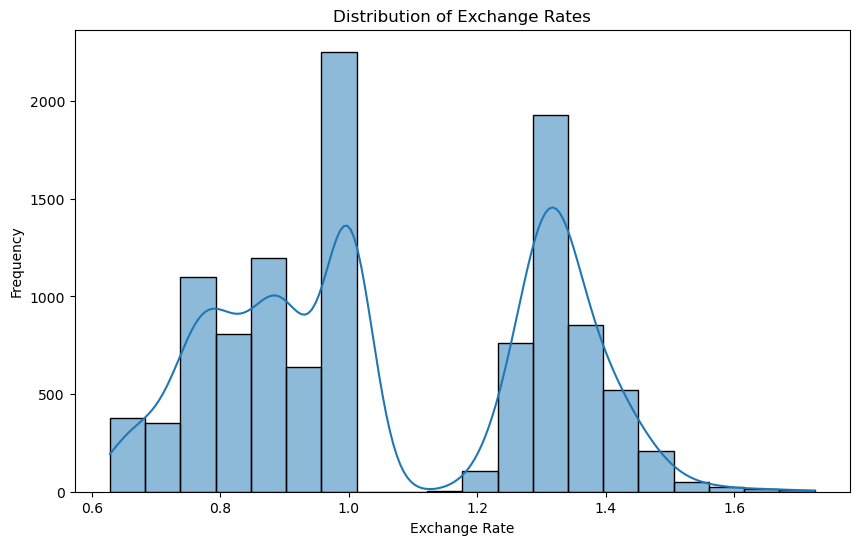

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(df_exchange_rates['Exchange'], bins=20, kde=True)
plt.title('Distribution of Exchange Rates')
plt.xlabel('Exchange Rate')
plt.ylabel('Frequency')
plt.show()



In [150]:
df_exchange_rates.to_csv("Cleaned_exchange.csv")

In [62]:
df_sales=pd.read_csv("Sales.csv")


In [64]:
df_sales["Currency Code"]=df_sales["Currency Code"].astype(str)

In [66]:
df_sales["Order Date"]=pd.to_datetime(df_sales["Order Date"])
df_sales["Delivery Date"]=pd.to_datetime(df_sales["Order Date"])

In [68]:
df_sales.isna().sum()

Order Number     0
Line Item        0
Order Date       0
Delivery Date    0
CustomerKey      0
StoreKey         0
ProductKey       0
Quantity         0
Currency Code    0
dtype: int64

In [70]:
df_sales.dtypes
df_sales.fillna("unknown",inplace=True)

In [72]:
df_sales.isna().sum()
df_sales.head(3)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,2016-01-01,265598,10,1304,1,CAD
1,366001,1,2016-01-01,2016-01-01,1269051,0,1048,2,USD
2,366001,2,2016-01-01,2016-01-01,1269051,0,2007,1,USD


Text(0, 0.5, 'Frequency')

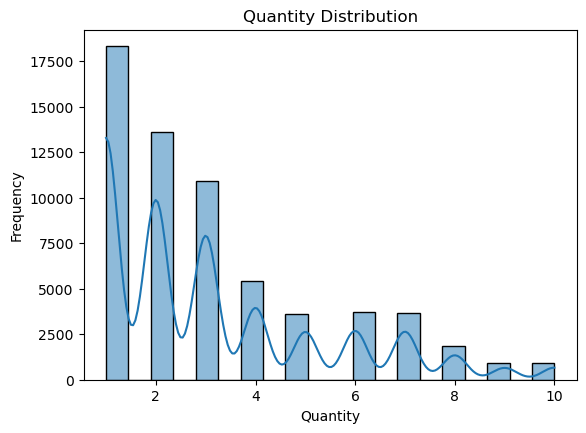

In [74]:
plt.figure(figsize=(14, 10))  # Adjusted figure size to fit fewer plots

# 1. Quantity Distribution
plt.subplot(2, 2, 1)
sns.histplot(df_sales['Quantity'].dropna(), bins=20, kde=True)
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Product')

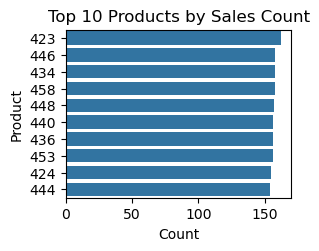

In [76]:
# 2. Sales by Product (Top 10 Products)
plt.subplot(2, 2, 2)
plt.subplot(2, 2, 2)
sns.countplot(y='ProductKey', data=df_sales, order=df_sales['ProductKey'].value_counts().index[:10])
plt.title('Top 10 Products by Sales Count')
plt.xlabel('Count')
plt.ylabel('Product')


Text(0, 0.5, 'Store')

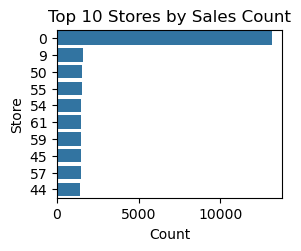

In [78]:
# 3. Sales by Store (Top 10 Stores)
plt.subplot(2, 2, 3)

sns.countplot(y='StoreKey', data=df_sales, order=df_sales['StoreKey'].value_counts().index[:10])
plt.title('Top 10 Stores by Sales Count')
plt.xlabel('Count')
plt.ylabel('Store')

Text(0, 0.5, 'Sales Count')

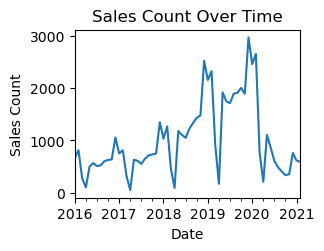

In [80]:
# 4. Sales Over Time
plt.subplot(2, 2, 4)

df_sales['Order Date'].groupby(df_sales['Order Date'].dt.to_period('M')).count().plot()
plt.title('Sales Count Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Count')

In [173]:
df_sales.dtypes

orderNumber              int64
lineItem                 int64
orderDate       datetime64[ns]
deliveryDate    datetime64[ns]
CustomerKey              int64
StoreKey                 int64
ProductKey               int64
Quantity                 int64
currencyCode            object
dtype: object

In [171]:
df_sales = df_sales.rename(columns={
    'Order Number': 'orderNumber',
    'Line Item': 'lineItem',
    'Order Date': 'orderDate',
    'Delivery Date': 'deliveryDate',
    'Currency Code': 'currencyCode'
})

# Check the renamed columns
print(df_sales.columns)


Index(['orderNumber', 'lineItem', 'orderDate', 'deliveryDate', 'CustomerKey',
       'StoreKey', 'ProductKey', 'Quantity', 'currencyCode'],
      dtype='object')


In [175]:
df_sales.to_csv("Cleaned_sales.csv")

In [86]:
df_product=pd.read_csv("Products.csv")

In [88]:
df_product.dtypes


ProductKey         int64
Product Name      object
Brand             object
Color             object
Unit Cost USD     object
Unit Price USD    object
SubcategoryKey     int64
Subcategory       object
CategoryKey        int64
Category          object
dtype: object

In [90]:
df_product["Unit Cost USD"]=df_product["Unit Cost USD"].str.replace("$","",regex=False)



In [92]:
df_product["Unit Price USD"]=df_product["Unit Price USD"].str.replace("$","",regex=False)

In [94]:
df_product.dtypes
df_product["Unit Cost USD"]=df_product["Unit Cost USD"].str.replace(",","",regex=False)

In [96]:
df_product["Unit Price USD"]=df_product["Unit Price USD"].str.replace(",","")

In [98]:
df_product["Unit Cost USD"]=df_product["Unit Cost USD"].astype(float).astype(int)

In [100]:
df_product["Unit Price USD"]=df_product["Unit Price USD"].astype(float)

In [102]:
df_product

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11,21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,43,129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,43,129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,1,3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,1,3.35,505,Cell phones Accessories,5,Cell phones


In [104]:
df_product.duplicated().sum()

0

Text(0, 0.5, 'Frequency')

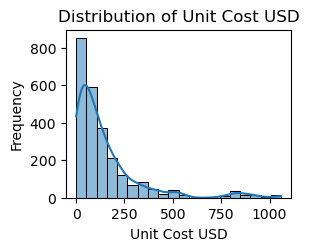

In [106]:
# 1. Distribution of Unit Cost USD
plt.subplot(2, 2, 1)
sns.histplot(df_product['Unit Cost USD'].dropna(), bins=20, kde=True)
plt.title('Distribution of Unit Cost USD')
plt.xlabel('Unit Cost USD')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

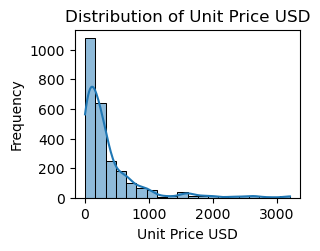

In [108]:
# 2. Distribution of Unit Price USD
plt.subplot(2, 2, 2)
sns.histplot(df_product['Unit Price USD'].dropna(), bins=20, kde=True)
plt.title('Distribution of Unit Price USD')
plt.xlabel('Unit Price USD')
plt.ylabel('Frequency')

Text(0, 0.5, 'Brand')

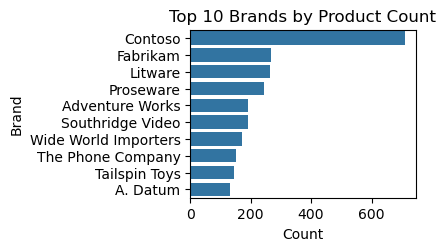

In [110]:
# 3. Top 10 Brands
plt.subplot(2, 2, 3)
sns.countplot(y='Brand', data=df_product, order=df_product['Brand'].value_counts().index[:10])
plt.title('Top 10 Brands by Product Count')
plt.xlabel('Count')
plt.ylabel('Brand')

Text(0, 0.5, 'Category')

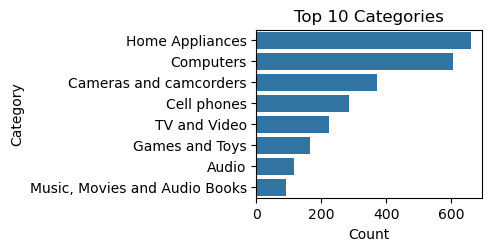

In [112]:
# 4. Top 10 Categories  
plt.subplot(2, 2, 4)
sns.countplot(y='Category', data=df_product, order=df_product['Category'].value_counts().index[:10])
plt.title('Top 10 Categories')
plt.xlabel('Count')
plt.ylabel('Category')


In [177]:
df_product = df_product.rename(columns={
    'Product Name': 'productName',
    'Unit Cost USD': 'unitCostUSD',
    'Unit Price USD': 'unitPriceUSD',
    
})

# Check the renamed columns
print(df_product.columns)


Index(['ProductKey', 'productName', 'Brand', 'Color', 'unitCostUSD',
       'unitPriceUSD', 'SubcategoryKey', 'Subcategory', 'CategoryKey',
       'Category'],
      dtype='object')


In [179]:
df_product.to_csv("Cleaned_product.csv")

In [116]:
df_customer=pd.read_csv("Customers.csv",encoding='ISO-8859-1')

In [118]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [120]:
df_customer.dtypes

CustomerKey     int64
Gender         object
Name           object
City           object
State Code     object
State          object
Zip Code       object
Country        object
Continent      object
Birthday       object
dtype: object

In [122]:
df_customer.isna().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [124]:
df_customer["State Code"]=df_customer["State Code"].fillna("Not available")

In [126]:
df_customer["Birthday"]=pd.to_datetime(df_customer["Birthday"])

In [128]:
df_customer['Age'] = df_customer['Birthday'].apply(get_age)

In [130]:
df_customer.rename(columns={
    'City'      : 'Cust_City',
    'StateCode' : 'Cust_StateCode',
    'State'     : 'Cust_State',
    'ZipCode'   : 'Cust_ZipCode',
    'Country'   : 'Cust_Country',
    'Continent' : 'Cust_Continent'
}, inplace=True)

In [133]:
df_customer

,CustomerKey,Gender,Name,Cust_City,State Code,Cust_State,Zip Code,Cust_Country,Cust_Continent,Birthday,Age
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03,85
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,45
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26,77
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17,67
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19,59
...,...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,1936-03-25,88
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,1992-02-16,32
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-11-09,87
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-10-12,87


Text(0, 0.5, 'Count')

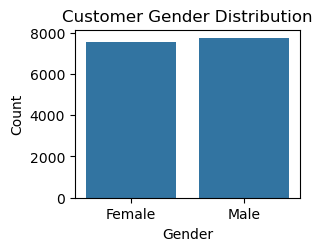

In [135]:
# 1. Gender Distribution
plt.subplot(2, 2, 1)
sns.countplot(x='Gender', data=df_customer)
plt.title('Customer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

Text(0, 0.5, 'City')

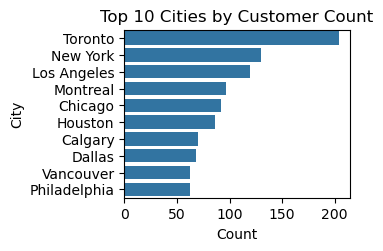

In [137]:
# 2. Top 10 Cities (City Distribution)
plt.subplot(2, 2, 2)
sns.countplot(y='Cust_City', data=df_customer, order=df_customer['Cust_City'].value_counts().index[:10])
plt.title('Top 10 Cities by Customer Count')
plt.xlabel('Count')
plt.ylabel('City')


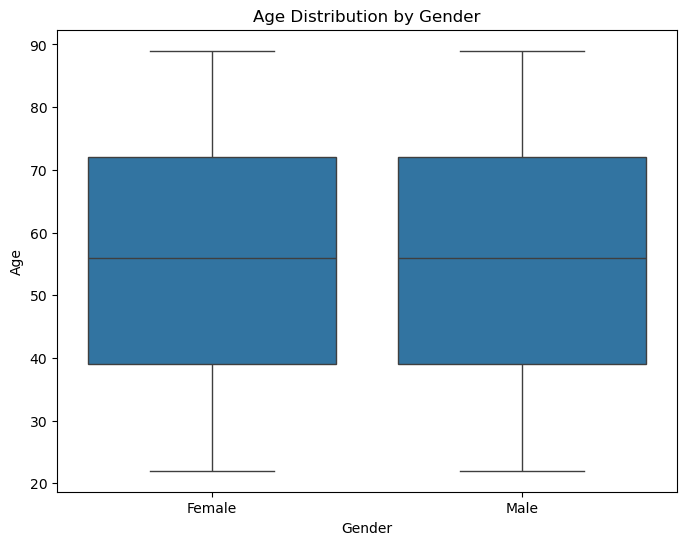

In [139]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Age', data=df_customer)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

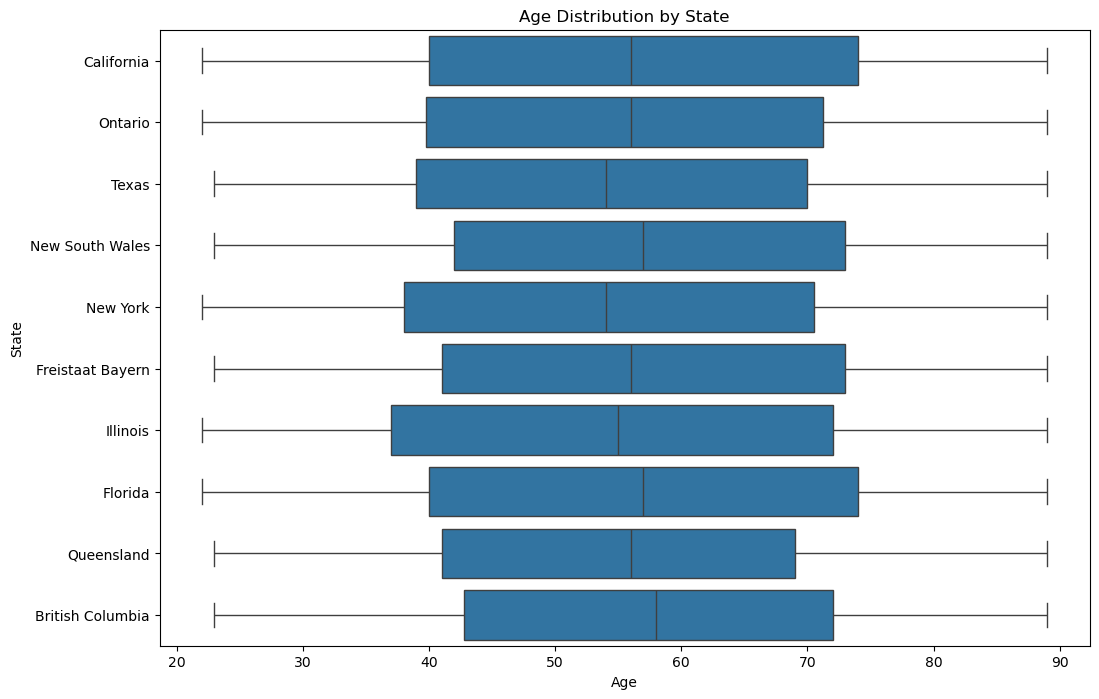

In [141]:
# 6. Age by State (Top 10 States by Customer Count)
plt.figure(figsize=(12, 8))
sns.boxplot(y='Cust_State', x='Age', data=df_customer, order=df_customer['Cust_State'].value_counts().index[:10])
plt.title('Age Distribution by State')
plt.xlabel('Age')
plt.ylabel('State')
plt.show()

In [145]:
df_customer.to_csv("Cleaned_customer.csv")

In [143]:
df_customer.head(2)


,CustomerKey,Gender,Name,Cust_City,State Code,Cust_State,Zip Code,Cust_Country,Cust_Continent,Birthday,Age
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03,85
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,45


In [87]:
df_sales.head(2)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,unknown,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD


In [110]:
df_product.head(2)

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6,12.99,101,MP4&MP3,1,Audio


In [91]:
df_exchange_rates.head(2)

,Date,Currency,Exchange
0,2015-01-01,USD,1.0000
1,2015-01-01,CAD,1.1583


In [181]:
df_store.head(2)

,StoreKey,Store_Country,Store_State,SquareMeters,OpenDate,StoreAge
0,1,Australia,Australian Capital Territory,595.0,2008-01-01,16
1,2,Australia,Northern Territory,665.0,2008-01-12,16


In [206]:
df=pd.merge(df_sales,df_customer,on="CustomerKey")

In [114]:
df.isna().sum()

Order Number     0
Line Item        0
Order Date       0
Delivery Date    0
CustomerKey      0
StoreKey         0
ProductKey       0
Quantity         0
Currency Code    0
Gender           0
Name             0
City             0
State Code       0
State            0
Zip Code         0
Country          0
Continent        0
Birthday         0
dtype: int64

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Number   62884 non-null  int64         
 1   Line Item      62884 non-null  int64         
 2   Order Date     62884 non-null  datetime64[ns]
 3   Delivery Date  62884 non-null  datetime64[ns]
 4   CustomerKey    62884 non-null  int64         
 5   StoreKey       62884 non-null  int64         
 6   ProductKey     62884 non-null  int64         
 7   Quantity       62884 non-null  int64         
 8   Currency Code  62884 non-null  object        
 9   Gender         62884 non-null  object        
 10  Name           62884 non-null  object        
 11  City           62884 non-null  object        
 12  State Code     62884 non-null  object        
 13  State          62884 non-null  object        
 14  Zip Code       62884 non-null  object        
 15  Country        6288

In [176]:
df

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,...,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Square Meters,Open Date,Date,Currency,Exchange
0,366005,1,2016-01-01,2016-01-01,844003,33,421,4,EUR,Male,...,469.00,303,Desktops,3,Computers,1540.0,2015-12-09,2016-01-01,EUR,0.9185
1,367006,1,2016-01-02,2016-01-02,693285,18,2445,3,EUR,Female,...,4.99,808,Fans,8,Home Appliances,310.0,2012-08-08,2016-01-02,EUR,0.9185
2,367010,1,2016-01-02,2016-01-02,1322959,66,917,1,USD,Male,...,179.00,308,Computers Accessories,3,Computers,840.0,2014-01-01,2016-01-02,USD,1.0000
3,367010,2,2016-01-02,2016-01-02,1322959,66,39,1,USD,Male,...,299.23,101,MP4&MP3,1,Audio,840.0,2014-01-01,2016-01-02,USD,1.0000
4,369007,1,2016-01-04,2016-01-04,571622,20,2510,3,EUR,Male,...,4.06,505,Cell phones Accessories,5,Cell phones,1715.0,2012-12-15,2016-01-04,EUR,0.9176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6176,2243014,1,2021-02-20,2021-02-20,1453427,50,423,1,USD,Male,...,599.00,303,Desktops,3,Computers,2000.0,2008-03-06,2021-02-20,USD,1.0000
6177,2243014,2,2021-02-20,2021-02-20,1453427,50,1617,1,USD,Male,...,57.99,602,Movie DVD,6,"Music, Movies and Audio Books",2000.0,2008-03-06,2021-02-20,USD,1.0000
6178,2243014,3,2021-02-20,2021-02-20,1453427,50,2506,4,USD,Male,...,4.74,505,Cell phones Accessories,5,Cell phones,2000.0,2008-03-06,2021-02-20,USD,1.0000
6179,2243021,1,2021-02-20,2021-02-20,1783631,55,1147,4,USD,Male,...,655.00,405,Camcorders,4,Cameras and camcorders,2000.0,2009-12-15,2021-02-20,USD,1.0000


""


In [208]:
df1=pd.merge(df,df_product,on="ProductKey")

In [212]:
df2=pd.merge(df1,df_store,on="StoreKey",how='left')

""


Index([], dtype='object')

In [223]:
df_exchange_rates.dtypes

Date        datetime64[ns]
Currency            object
Exchange           float64
dtype: object

In [225]:
df3=pd.merge(df2,df_exchange_rates,left_on=["Order Date","Currency Code"],right_on=["Date","Currency"])

In [216]:
df3.isna().sum()

Order Number      0
Line Item         0
Order Date        0
Delivery Date     0
CustomerKey       0
StoreKey          0
ProductKey        0
Quantity          0
Currency Code     0
Gender            0
Name              0
Cust_City         0
State Code        0
Cust_State        0
Zip Code          0
Cust_Country      0
Cust_Continent    0
Birthday          0
Age               0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
Store_Country     0
Store_State       0
SquareMeters      0
OpenDate          0
StoreAge          0
Date              0
Currency          0
Exchange          0
dtype: int64

In [218]:
df.drop_duplicates(inplace=True)

In [220]:
df3.drop(columns=['Date', 'Currency'], inplace=True)

In [227]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Number    62884 non-null  int64         
 1   Line Item       62884 non-null  int64         
 2   Order Date      62884 non-null  datetime64[ns]
 3   Delivery Date   62884 non-null  datetime64[ns]
 4   CustomerKey     62884 non-null  int64         
 5   StoreKey        62884 non-null  int64         
 6   ProductKey      62884 non-null  int64         
 7   Quantity        62884 non-null  int64         
 8   Currency Code   62884 non-null  object        
 9   Gender          62884 non-null  object        
 10  Name            62884 non-null  object        
 11  Cust_City       62884 non-null  object        
 12  State Code      62884 non-null  object        
 13  Cust_State      62884 non-null  object        
 14  Zip Code        62884 non-null  object        
 15  Cu

# Feature Engineering

In [230]:
# Function to Categorize Order Frequency by Customer
def categorize_frequency(count):
    if count >= 1 and count <= 4:
        return 'Occasional'
    elif count >= 5 and count <= 10:
        return 'Moderate'
    elif count > 10:
        return 'Frequent'
    else:
        return 'Unknown'

In [238]:
#Calculating Reveunue Per Customer USD and Profit Per CustomerUSD
df3['RevenueUSD'] = df3['Quantity'] *df3['Unit Price USD']
df3['ProfitUSD'] = df3['RevenueUSD']- ((df3['Quantity'] * df3['Unit Cost USD']))

# Number of orders per Customer
order_counts = df3.groupby('CustomerKey')['Order Number'].count()

# Categorize Order Frequency
order_counts_category = order_counts.apply(categorize_frequency)

# Reset index to merge to dataframe
order_counts_category = order_counts_category.reset_index(name='Frequency')

# Merge with the original DataFrame
df3= df3.merge(order_counts_category, on='CustomerKey', how='left')

#final_merged.info()
df3.to_csv("Merged_Data.csv", index=False)
print("\nMerging of datasets completed ....")


Merging of datasets completed ....


In [240]:
order_counts

CustomerKey
301         1
325        10
554         4
1042        3
1314        5
           ..
2099383     6
2099600     3
2099758     4
2099862     3
2099937     6
Name: Order Number, Length: 11887, dtype: int64

In [180]:
df.dtypes

Order Number               int64
Line Item                  int64
Order Date        datetime64[ns]
Delivery Date     datetime64[ns]
CustomerKey                int64
StoreKey                   int64
ProductKey                 int64
Quantity                   int64
Currency Code             object
Gender                    object
Name                      object
City                      object
State Code                object
State                     object
Zip Code                  object
Country                   object
Continent                 object
Birthday          datetime64[ns]
Product Name              object
Brand                     object
Color                     object
Unit Cost USD              int32
Unit Price USD           float64
SubcategoryKey             int64
Subcategory               object
CategoryKey                int64
Category                  object
Square Meters            float64
Open Date         datetime64[ns]
Date              datetime64[ns]
Currency  